In [43]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

np.random.seed(23)

In [2]:
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

X_train = pd.read_csv('../data/x_train_processed.csv')
X_test = pd.read_csv('../data/x_test_processed.csv')

X_train_ss = pd.read_csv('../data/x_train_ss_processed.csv')
X_test_ss = pd.read_csv('../data/x_test_ss_processed.csv')

In [3]:
for i in [y_train, y_test, X_train, X_test, X_train_ss, X_test_ss]:
    print(i.shape)

(17696, 1)
(4425, 1)
(17696, 83)
(4425, 83)
(17696, 25)
(4425, 25)


### I will be looking at different kernels with other parameters standard to determine which kernel to use

In [4]:
clf = svm.SVC(kernel='linear')

cross_val_score(clf, X_train_ss, y_train,
                cv = 5, scoring = 'accuracy').mean()

0.7676872396843566

In [5]:
# sigmoid
clf = svm.SVC(kernel='sigmoid')

cross_val_score(clf, X_train_ss, y_train,
                cv = 5, scoring = 'accuracy').mean()

0.6782885458722261

In [6]:
# poly
clf = svm.SVC(kernel='poly')

cross_val_score(clf, X_train_ss, y_train,
                cv = 5, scoring = 'accuracy').mean()

0.7754855899476853

In [7]:
# rbf
# using non-scaled X_train
clf = svm.SVC(kernel='rbf')

cross_val_score(clf, X_train, y_train,
                cv = 5, scoring = 'accuracy').mean()

0.7554249899824873

In [8]:
clf2 = svm.SVC(kernel='rbf',
              gamma=0.005, C=1)

cross_val_score(clf, X_train_ss, y_train, 
                cv = 5, scoring = 'accuracy').mean()

0.7857140850219426

### Using Grid search to find parameters to use

In [9]:

clf = svm.SVC()

gamma_range = np.logspace(-1, 2, 2) 
C_range = np.logspace(-1, 2, 8)
# kernel_range = ['linear',
#                 'poly',
#                 'rbf',
#                 'sigmoid']

param_grid = dict(gamma=gamma_range,
                  C=C_range,
                  kernel=['rbf'])

grid = GridSearchCV(clf, param_grid, cv = 5,
                    scoring = 'accuracy', verbose = 1, n_jobs = -1)

grid.fit(X_train_ss, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.

/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/viloavila/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.26826958,   0.71968567,   1.93069773,
         5.17947468,  13.89495494,  37.2759372 , 100.        ]),
                         'gamma': array([  0.1, 100. ]), 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [10]:
grid.best_params_

{'C': 0.7196856730011519, 'gamma': 0.1, 'kernel': 'rbf'}

In [11]:
grid.best_score_

0.7805718044134526

In [12]:
knn = KNeighborsClassifier( n_neighbors = 5, # default neighbors
                            p = 2, # eucl dist
                            weights='distance', # closer neighbors are more important
                            n_jobs = -1)

knn.fit(X_train_ss, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [13]:
cross_val_score(knn, X_train_ss, y_train,
                cv = 5, scoring = 'accuracy').mean()

0.7502260844855468

### Out of the different parameters tested, this SVM model scored the best 

In [14]:
clf2.fit(X_train_ss, y_train)

SVC(C=1, gamma=0.005)

In [41]:
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=620,
                         shuffle=True)
    s = cross_val_score(model, X, y.values.ravel(), cv=cv, n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, s.mean(), 2 * s.std()))

In [42]:
print(score(clf2, 'SVM Classifier train', X_train_ss, y_train))
print(score(clf2, 'SVM Classifier test', X_test_ss, y_test))

SVM Classifier train Score: 0.78 +- 0.012
None
SVM Classifier test Score: 0.77 +- 0.027
None


### Creating a confusion matrix based on the best SVM model


In [17]:
preds = clf2.predict(X_train_ss)

In [18]:
matrix = confusion_matrix(y_train, preds)

''

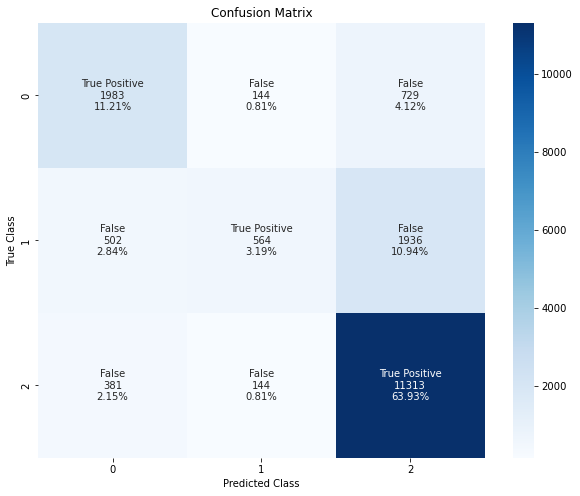

In [39]:
group_names = ['True Positive','False','False','False','True Positive',
               'False','False','False','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

plt.figure(figsize=(10,8))
ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')

;

### Metrics for our model

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2856
           1       0.66      0.19      0.29      3002
           2       0.81      0.96      0.88     11838

    accuracy                           0.78     17696
   macro avg       0.72      0.61      0.62     17696
weighted avg       0.77      0.78      0.75     17696



### Analysis

- Overall, this logistic SVM classifier was 78% accurate in predicting the target class. This is 11% more accurate than our baseline model with 67% probability. 
- It was the most precise in predicting the "Yes" class, with a precision of 81%. The precision for predicting "No" is 69% and the precision for predicting "Don't know" is 66% precise. 
- Best model used the “rbf” kernel parameter which features cannot be extracted from
- This model cannot be interpreted by extracting of features or feature importances, but it can be used for purely predicting classes. 